In [23]:
import numpy as np
from icp import icp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
import cv2 as cv2
from stl import mesh

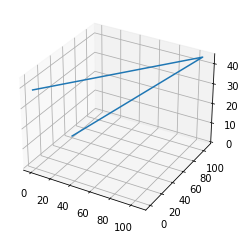

In [10]:
import trimesh
mesh = trimesh.load_mesh('test.STL')
assert(mesh.is_watertight)# you cannot build a solid if your volume is not tight
# volume = mesh.voxelized(pitch=0.1)
# mat = mesh.matrix

fig = plt.figure()
ax2 = fig.add_subplot(111,projection='3d')
ax2.plot3D(mesh.vertices[0], mesh.vertices[1], mesh.vertices[2])
plt.show()

In [25]:
# matrix of boolean
src_mesh = mesh.Mesh.from_file('test.STL')
print('src_mesh shape',src_mesh.vectors.shape)
# src_mesh = np.float32(src_mesh)
# points = np.around(np.unique(src_mesh.vectors.reshape([src_mesh.vectors.size/3, 3]), axis=0),2)
# print("Points are", points.tolist())
x,y = np.meshgrid(src_mesh.vectors[0],src_mesh.vectors[1])

src_mesh shape (140, 3, 3)


In [28]:
src_mesh.vectors[:,1].shape

(140, 3)

In [ ]:
dest_mesh = mesh.Mesh.from_file('bugsbunny.STL')
print('dest_mesh shape',dest_mesh.vectors.shape)
dest_mesh = np.float32(dest_mesh)

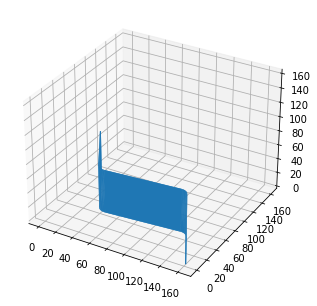

In [6]:
figure = plt.figure()
axes = Axes3D(figure)

# Load the STL files and add the vectors to the plot
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(src_mesh.vectors))
scale = src_mesh.points.flatten()
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'vectors'

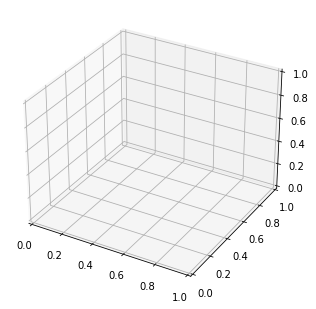

In [7]:
figure = plt.figure()
axes = Axes3D(figure)

# Load the STL files and add the vectors to the plot
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(dest_mesh.vectors))
scale1 = dest_mesh.points.flatten()
axes.auto_scale_xyz(scale1, scale1, scale1)

# Show the plot to the screen
plt.show()

In [22]:
scale, offset = icp(src_mesh[:,0:3], dest_mesh[:,0:3], dim_offset='all', dim_scale=[0,10], num_iter=80,use_gpu=True)


ValueError: Tensor conversion requested dtype float64 for Tensor with dtype float32: <tf.Tensor 'Tile:0' shape=(2,) dtype=float32>

In [21]:
src_mesh[:,0:3]

array([[161.3278    ,   0.        ,  60.        ],
       [161.3278    ,   0.        ,   0.        ],
       [162.20796   ,   0.4746504 ,  60.        ],
       [162.20796   ,   0.4746504 ,   0.        ],
       [139.06636   ,  43.387745  ,  60.        ],
       [139.06636   ,  43.387745  ,   0.        ],
       [139.06636   ,  43.387745  ,  60.        ],
       [139.06636   ,  43.387745  ,  60.        ],
       [138.1622    ,  44.775406  ,  60.        ],
       [138.1622    ,  44.775406  ,  60.        ],
       [137.04143   ,  45.9948    ,  60.        ],
       [137.04143   ,  45.9948    ,  60.        ],
       [135.73476   ,  47.01248   ,  60.        ],
       [135.73476   ,  47.01248   ,  60.        ],
       [134.27803   ,  47.800533  ,  60.        ],
       [134.27803   ,  47.800533  ,  60.        ],
       [132.71121   ,  48.33734   ,  60.        ],
       [132.71121   ,  48.33734   ,  60.        ],
       [131.07729   ,  48.608173  ,  60.        ],
       [131.07729   ,  48.60817

In [44]:
mesh2 = mesh.Mesh.from_file('test.STL')
# mesh2.vectors.size
points = np.around(np.unique(mesh2.points.reshape([420, 3]), axis=0),2)
# print "Points are", points.tolist()
# size = np.size(points)/3
xx,yy = np.meshgrid((points[0]),points[1])
Z = np.unique(points[3])